In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
df= pd.read_csv('Mexico_Limpio_new.csv')

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 26582 non-null  int64  
 1   Unnamed: 0                   26582 non-null  int64  
 2   listing_url                  26582 non-null  object 
 3   last_scraped                 26582 non-null  object 
 4   source                       26582 non-null  object 
 5   name                         26582 non-null  object 
 6   neighborhood_overview        26582 non-null  object 
 7   picture_url                  26582 non-null  object 
 8   host_url                     26582 non-null  object 
 9   host_name                    26582 non-null  object 
 10  host_since                   26582 non-null  object 
 11  host_location                26582 non-null  object 
 12  host_about                   26582 non-null  object 
 13  host_response_ti

In [293]:
df['host_response_time'] = df['host_response_time'].map({'a few days or more':1, 'within an hour':2,'within a few hours':3, 'within a day':4})
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})
#df["host_response_rate"] = df["host_response_rate"].str.rstrip('%').astype(float) / 100
df['room_type'] = df['room_type'].map({'Entire home/apt': 1,'Private room': 2,'Shared room': 3,'Hotel room': 4}).fillna(5).astype(int)
#df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip('%').astype(float) / 100
df['host_verifications'] = df['host_verifications'].map({"['email', 'phone', 'work_email']":1, "['email', 'phone']":2, "['phone']": 3,"['phone', 'work_email']": 4, "['email']": 5,"[]": 6,"['email', 'work_email']": 7,"['work_email']": 8})
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f':0})

In [294]:
selected_columns_30 = [
    'host_id', 'host_acceptance_rate', 'host_total_listings_count',
    'price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
    'minimum_nights', 'maximum_nights', 'availability_365', 
    'number_of_reviews', 'review_scores_rating', 
    'review_scores_cleanliness', 'review_scores_communication', 
    'review_scores_location', 'reviews_per_month', 
    'host_response_time', 'host_is_superhost', 
    'room_type', 'host_listings_count', 'latitude', 'longitude',
]

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
df1= df[selected_columns_30]

In [295]:
df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

C:\Users\lapep\AppData\Local\Temp\ipykernel_21844\3375836176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)


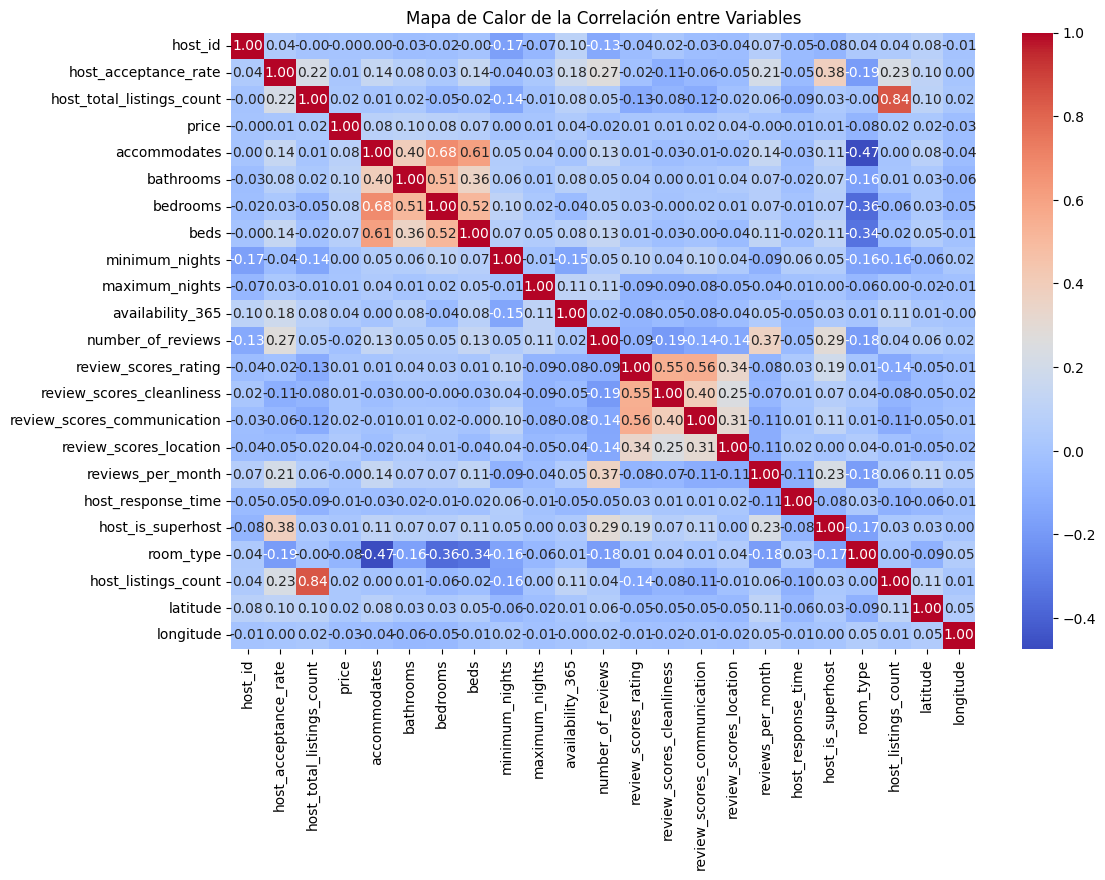

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva figura antes del heatmap
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura según sea necesario

# Generar la matriz de correlación
correlation_matrix = df1.corr()

# Crear el heatmap con la matriz de correlación
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

# Agregar título
plt.title("Mapa de Calor de la Correlación entre Variables")

# Mostrar el gráfico
plt.show()


In [297]:
Y1= df1['host_id']
X1= df1[['number_of_reviews','minimum_nights']]

In [298]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [299]:
model.fit(X=X1, y=Y1)

LinearRegression()

In [300]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'minimum_nights'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([  -721857.6806821 , -45588536.97639336]),
 'rank_': 2,
 'singular_': array([5114.26656525,  106.75446035]),
 'intercept_': np.float64(307669622.3953206)}

In [301]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(X1,Y1)

0.04359546049074914

In [302]:
#Predicciones
y_pred= model.predict(X=X1)
y_pred

array([2.62081085e+08, 2.15882194e+08, 1.81121522e+08, ...,
       2.62081085e+08, 2.62081085e+08, 2.62081085e+08], shape=(26582,))

In [303]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,host_id,host_acceptance_rate,host_total_listings_count,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
0,2.620811e+08,153786,0.9,1.0,3865.0,2.0,1.0,1.0,1.0,1.0,...,4.90,4.90,4.90,1.70,1,0,1,1.0,19.383820,-99.200000
1,2.158822e+08,196253,93.0,13.0,100.0,2.9,1.0,1.4,1.0,1.0,...,4.70,4.78,4.98,0.41,2,1,1,12.0,19.411620,-99.177940
2,1.811215e+08,334451,57.0,4.0,2029.0,4.0,1.0,2.0,2.0,2.0,...,4.75,4.92,4.98,0.31,2,1,1,3.0,19.411520,-99.168570
3,1.430520e+08,212109,100.0,4.0,1140.0,2.0,1.0,1.0,1.0,1.6,...,4.96,4.98,4.96,0.83,3,1,1,3.0,19.356140,-99.163080
4,2.541407e+08,540705,100.0,7.0,3633.0,2.0,1.5,1.0,1.0,1.0,...,5.00,4.73,4.91,0.11,2,1,1,5.0,19.432110,-99.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,2.620811e+08,67472234,100.0,7.3,488.0,4.0,1.0,2.0,2.0,1.0,...,4.90,4.90,4.90,1.70,2,1,2,6.2,19.387329,-99.200000
26578,2.620811e+08,596009321,100.0,16.0,2800.0,2.0,1.0,1.0,1.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26579,2.620811e+08,596009321,100.0,16.0,2700.0,2.0,1.0,1.0,1.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26580,2.620811e+08,596009321,100.0,16.0,2600.0,2.0,1.0,1.0,1.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736


<Axes: xlabel='minimum_nights', ylabel='host_id'>

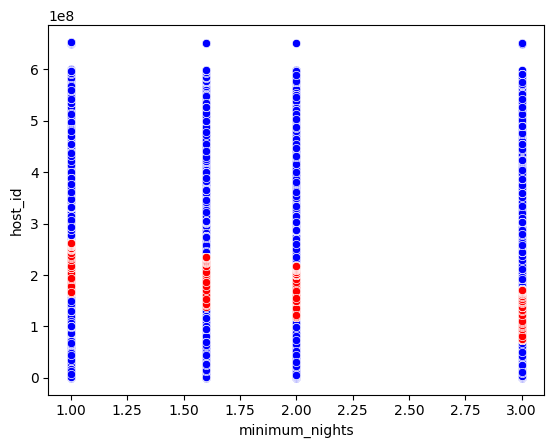

In [304]:
sns.scatterplot(x='minimum_nights', y='host_id', color="blue", data=df1)
sns.scatterplot(x='minimum_nights', y=y_pred, color="red", data=df1)

In [305]:
coef_Deter= model.score(X=X1, y=Y1)
coef_Deter

0.04359546049074914

In [306]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.20879525974204763)

In [307]:
Y2= df1['host_acceptance_rate']
X2= df1[['host_is_superhost','number_of_reviews','host_listings_count']]

In [308]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [309]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [310]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'number_of_reviews', 'host_listings_count'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([23.73755229,  0.19095221,  1.14494566]),
 'rank_': 3,
 'singular_': array([5114.52894252, 1096.74357303,   76.05722349]),
 'intercept_': np.float64(58.456821958581195)}

In [311]:
#Predicciones
y_pred2= model2.predict(X=X2)
y_pred2

array([ 59.60176762, 108.15466387,  94.98586972, ...,  76.77595251,
        76.77595251,  86.77415689], shape=(26582,))

In [312]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones2', y_pred2)
df1

,Predicciones2,Predicciones,host_id,host_acceptance_rate,host_total_listings_count,price,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
0,59.601768,2.620811e+08,153786,0.9,1.0,3865.0,2.0,1.0,1.0,1.0,...,4.90,4.90,4.90,1.70,1,0,1,1.0,19.383820,-99.200000
1,108.154664,2.158822e+08,196253,93.0,13.0,100.0,2.9,1.0,1.4,1.0,...,4.70,4.78,4.98,0.41,2,1,1,12.0,19.411620,-99.177940
2,94.985870,1.811215e+08,334451,57.0,4.0,2029.0,4.0,1.0,2.0,2.0,...,4.75,4.92,4.98,0.31,2,1,1,3.0,19.411520,-99.168570
3,109.880142,1.430520e+08,212109,100.0,4.0,1140.0,2.0,1.0,1.0,1.0,...,4.96,4.98,4.96,0.83,3,1,1,3.0,19.356140,-99.163080
4,90.019577,2.541407e+08,540705,100.0,7.0,3633.0,2.0,1.5,1.0,1.0,...,5.00,4.73,4.91,0.11,2,1,1,5.0,19.432110,-99.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,89.293037,2.620811e+08,67472234,100.0,7.3,488.0,4.0,1.0,2.0,2.0,...,4.90,4.90,4.90,1.70,2,1,2,6.2,19.387329,-99.200000
26578,76.775953,2.620811e+08,596009321,100.0,16.0,2800.0,2.0,1.0,1.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26579,76.775953,2.620811e+08,596009321,100.0,16.0,2700.0,2.0,1.0,1.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26580,76.775953,2.620811e+08,596009321,100.0,16.0,2600.0,2.0,1.0,1.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736


<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

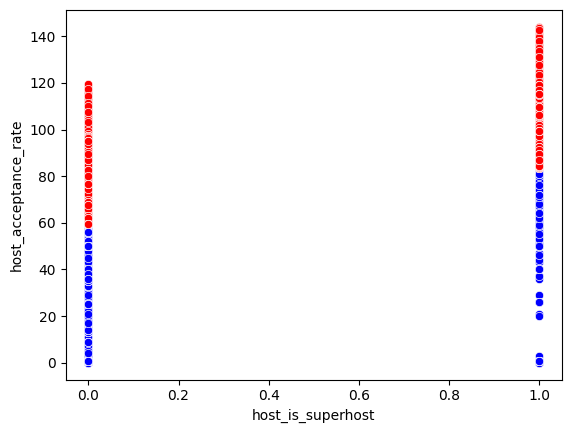

In [313]:
sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred2, color="red", data=df1)

In [314]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.22241651277061758

In [315]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.47161055201364777)

In [316]:
Y3= df1['host_is_superhost']
X3= df1[['host_acceptance_rate','number_of_reviews','reviews_per_month']]

In [317]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [318]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [319]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'number_of_reviews', 'reviews_per_month'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00434808, 0.00261416, 0.04545617]),
 'rank_': 3,
 'singular_': array([6205.64359152, 4569.66494409,  162.24953914]),
 'intercept_': np.float64(-0.09385906477509448)}

In [320]:
#Predicciones
y_pred3= model3.predict(X=X3)
y_pred3

array([-0.0126703 ,  0.4964553 ,  0.2961665 , ...,  0.41822429,
        0.41822429,  0.41822429], shape=(26582,))

In [322]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones3', y_pred3)
df1

,Predicciones3,Predicciones2,Predicciones,host_id,host_acceptance_rate,host_total_listings_count,price,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
0,-0.012670,59.601768,2.620811e+08,153786,0.9,1.0,3865.0,2.0,1.0,1.0,...,4.90,4.90,4.90,1.70,1,0,1,1.0,19.383820,-99.200000
1,0.496455,108.154664,2.158822e+08,196253,93.0,13.0,100.0,2.9,1.0,1.4,...,4.70,4.78,4.98,0.41,2,1,1,12.0,19.411620,-99.177940
2,0.296166,94.985870,1.811215e+08,334451,57.0,4.0,2029.0,4.0,1.0,2.0,...,4.75,4.92,4.98,0.31,2,1,1,3.0,19.411520,-99.168570
3,0.710675,109.880142,1.430520e+08,212109,100.0,4.0,1140.0,2.0,1.0,1.0,...,4.96,4.98,4.96,0.83,3,1,1,3.0,19.356140,-99.163080
4,0.374705,90.019577,2.541407e+08,540705,100.0,7.0,3633.0,2.0,1.5,1.0,...,5.00,4.73,4.91,0.11,2,1,1,5.0,19.432110,-99.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,0.418224,89.293037,2.620811e+08,67472234,100.0,7.3,488.0,4.0,1.0,2.0,...,4.90,4.90,4.90,1.70,2,1,2,6.2,19.387329,-99.200000
26578,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2800.0,2.0,1.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26579,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2700.0,2.0,1.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26580,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2600.0,2.0,1.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736


<Axes: xlabel='reviews_per_month', ylabel='host_is_superhost'>

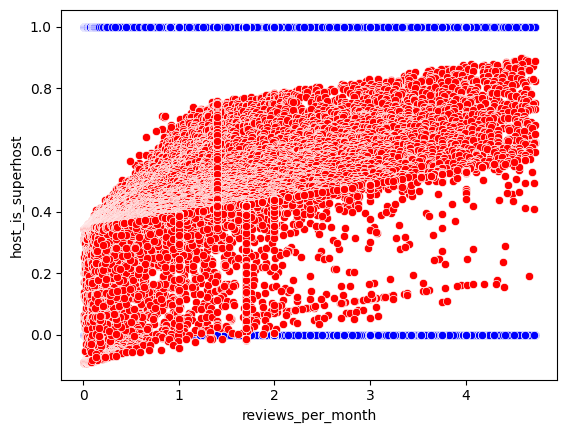

In [321]:
sns.scatterplot(x='reviews_per_month', y='host_is_superhost', color="blue", data=df1)
sns.scatterplot(x='reviews_per_month', y=y_pred3, color="red", data=df1)

In [323]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.19233368606464507

In [324]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.4385586460949608)

In [325]:
Y4= df1['host_total_listings_count']
X4= df1[['host_acceptance_rate','minimum_nights','host_listings_count']]

In [326]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [327]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [328]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'minimum_nights', 'host_listings_count'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00537179, -0.08720514,  0.95891256]),
 'rank_': 3,
 'singular_': array([5770.5808896 , 1066.47099059,  105.43572151]),
 'intercept_': np.float64(1.1157022440217075)}

In [329]:
#Predicciones
y_pred4= model4.predict(X=X4)
y_pred4

array([ 1.99224427, 13.03502438,  4.12422172, ..., 16.90827716,
       16.90827716,  5.40132644], shape=(26582,))

In [330]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones4', y_pred4)
df1

,Predicciones4,Predicciones3,Predicciones2,Predicciones,host_id,host_acceptance_rate,host_total_listings_count,price,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
0,1.992244,-0.012670,59.601768,2.620811e+08,153786,0.9,1.0,3865.0,2.0,1.0,...,4.90,4.90,4.90,1.70,1,0,1,1.0,19.383820,-99.200000
1,13.035024,0.496455,108.154664,2.158822e+08,196253,93.0,13.0,100.0,2.9,1.0,...,4.70,4.78,4.98,0.41,2,1,1,12.0,19.411620,-99.177940
2,4.124222,0.296166,94.985870,1.811215e+08,334451,57.0,4.0,2029.0,4.0,1.0,...,4.75,4.92,4.98,0.31,2,1,1,3.0,19.411520,-99.168570
3,4.390091,0.710675,109.880142,1.430520e+08,212109,100.0,4.0,1140.0,2.0,1.0,...,4.96,4.98,4.96,0.83,3,1,1,3.0,19.356140,-99.163080
4,6.360239,0.374705,90.019577,2.541407e+08,540705,100.0,7.0,3633.0,2.0,1.5,...,5.00,4.73,4.91,0.11,2,1,1,5.0,19.432110,-99.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,7.510934,0.418224,89.293037,2.620811e+08,67472234,100.0,7.3,488.0,4.0,1.0,...,4.90,4.90,4.90,1.70,2,1,2,6.2,19.387329,-99.200000
26578,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2800.0,2.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26579,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2700.0,2.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26580,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2600.0,2.0,1.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736


<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

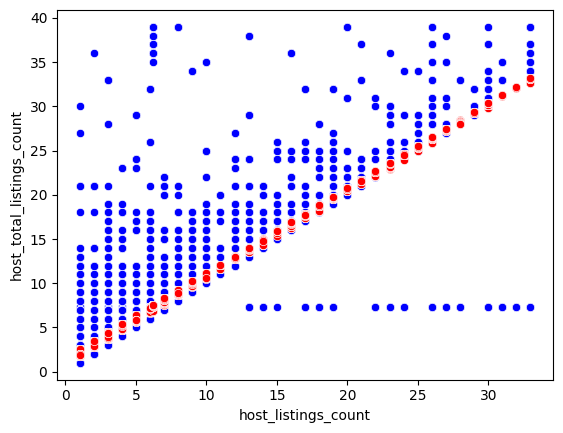

In [331]:
sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color="blue", data=df1)
sns.scatterplot(x='host_listings_count', y=y_pred4, color="red", data=df1)

In [332]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.7111363250615454

In [333]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.8432889926125833)

In [334]:
Y5= df1['room_type']
X5= df1[['accommodates','bedrooms','beds']]

In [335]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [336]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [337]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.14483747, -0.05361506, -0.05635075]),
 'rank_': 3,
 'singular_': array([257.15848395,  85.85677964,  71.84273295]),
 'intercept_': np.float64(1.955369756062189)}

In [338]:
#Predicciones
y_pred5= model5.predict(X=X5)
y_pred5

array([1.55572901, 1.40392926, 1.15608826, ..., 1.55572901, 1.55572901,
       1.55572901], shape=(26582,))

In [339]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones5', y_pred5)
df1

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,host_id,host_acceptance_rate,host_total_listings_count,price,accommodates,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
0,1.555729,1.992244,-0.012670,59.601768,2.620811e+08,153786,0.9,1.0,3865.0,2.0,...,4.90,4.90,4.90,1.70,1,0,1,1.0,19.383820,-99.200000
1,1.403929,13.035024,0.496455,108.154664,2.158822e+08,196253,93.0,13.0,100.0,2.9,...,4.70,4.78,4.98,0.41,2,1,1,12.0,19.411620,-99.177940
2,1.156088,4.124222,0.296166,94.985870,1.811215e+08,334451,57.0,4.0,2029.0,4.0,...,4.75,4.92,4.98,0.31,2,1,1,3.0,19.411520,-99.168570
3,1.555729,4.390091,0.710675,109.880142,1.430520e+08,212109,100.0,4.0,1140.0,2.0,...,4.96,4.98,4.96,0.83,3,1,1,3.0,19.356140,-99.163080
4,1.555729,6.360239,0.374705,90.019577,2.541407e+08,540705,100.0,7.0,3633.0,2.0,...,5.00,4.73,4.91,0.11,2,1,1,5.0,19.432110,-99.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.156088,7.510934,0.418224,89.293037,2.620811e+08,67472234,100.0,7.3,488.0,4.0,...,4.90,4.90,4.90,1.70,2,1,2,6.2,19.387329,-99.200000
26578,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2800.0,2.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26579,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2700.0,2.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26580,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2600.0,2.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736


<Axes: xlabel='accommodates', ylabel='room_type'>

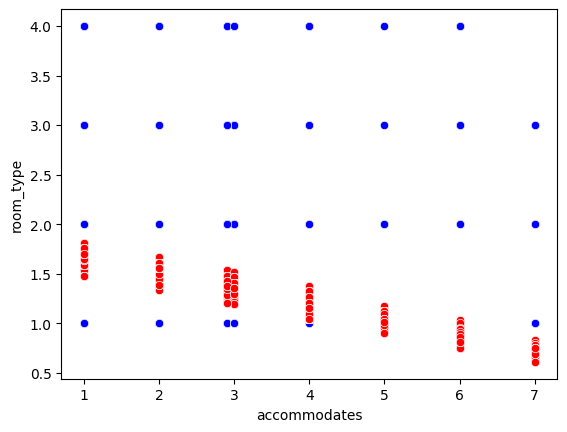

In [340]:
sns.scatterplot(x='accommodates', y='room_type', color="blue", data=df1)
sns.scatterplot(x='accommodates', y=y_pred5, color="red", data=df1)

In [341]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

0.22995358196823223

In [342]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.47953475574585025)

In [343]:
Y6= df1['accommodates']
X6= df1[['beds','bedrooms','bathrooms']]

In [344]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)
model6.fit(X=X6, y=Y6)

LinearRegression()

In [345]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds', 'bedrooms', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.71812401, 1.09751986, 0.06467233]),
 'rank_': 3,
 'singular_': array([143.91422272,  81.5429207 ,  66.4441525 ]),
 'intercept_': np.float64(0.24086285633266824)}

In [346]:
#Predicciones
y_pred6= model6.predict(X=X6)
y_pred6

array([2.12117906, 2.560187  , 3.93682293, ..., 2.12117906, 2.12117906,
       2.12117906], shape=(26582,))

In [347]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones6', y_pred6)
df1

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,host_id,host_acceptance_rate,host_total_listings_count,price,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
0,2.121179,1.555729,1.992244,-0.012670,59.601768,2.620811e+08,153786,0.9,1.0,3865.0,...,4.90,4.90,4.90,1.70,1,0,1,1.0,19.383820,-99.200000
1,2.560187,1.403929,13.035024,0.496455,108.154664,2.158822e+08,196253,93.0,13.0,100.0,...,4.70,4.78,4.98,0.41,2,1,1,12.0,19.411620,-99.177940
2,3.936823,1.156088,4.124222,0.296166,94.985870,1.811215e+08,334451,57.0,4.0,2029.0,...,4.75,4.92,4.98,0.31,2,1,1,3.0,19.411520,-99.168570
3,2.121179,1.555729,4.390091,0.710675,109.880142,1.430520e+08,212109,100.0,4.0,1140.0,...,4.96,4.98,4.96,0.83,3,1,1,3.0,19.356140,-99.163080
4,2.153515,1.555729,6.360239,0.374705,90.019577,2.541407e+08,540705,100.0,7.0,3633.0,...,5.00,4.73,4.91,0.11,2,1,1,5.0,19.432110,-99.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,3.936823,1.156088,7.510934,0.418224,89.293037,2.620811e+08,67472234,100.0,7.3,488.0,...,4.90,4.90,4.90,1.70,2,1,2,6.2,19.387329,-99.200000
26578,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2800.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26579,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2700.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26580,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,2600.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736


<Axes: xlabel='bedrooms', ylabel='accommodates'>

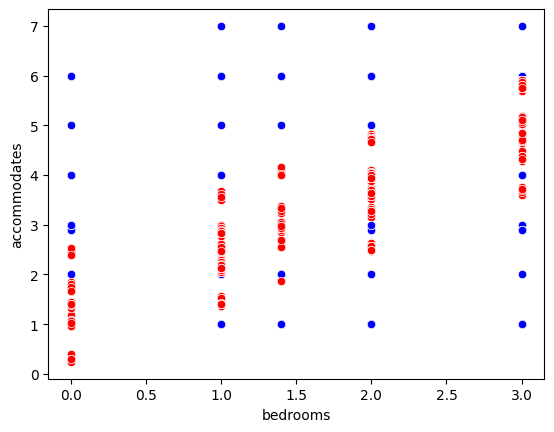

In [348]:
sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bedrooms', y=y_pred6, color="red", data=df1)

In [349]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.5526897035066762

In [350]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.7434310348019353)

In [351]:
Y7= df1['bedrooms']
X7= df1[['beds','bathrooms','accommodates']]

In [352]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)
model7.fit(X=X7, y=Y7)

LinearRegression()

In [353]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds', 'bathrooms', 'accommodates'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.10645536, 0.30745142, 0.22687257]),
 'rank_': 3,
 'singular_': array([248.80204598,  88.15459869,  78.19212685]),
 'intercept_': np.float64(0.17708146968985128)}

In [354]:
#Predicciones
y_pred7= model7.predict(X=X7)
y_pred7

array([1.04473339, 1.2489187 , 1.60493388, ..., 1.04473339, 1.04473339,
       1.04473339], shape=(26582,))

In [355]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones7', y_pred7)
df1

,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,host_id,host_acceptance_rate,host_total_listings_count,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
0,1.044733,2.121179,1.555729,1.992244,-0.012670,59.601768,2.620811e+08,153786,0.9,1.0,...,4.90,4.90,4.90,1.70,1,0,1,1.0,19.383820,-99.200000
1,1.248919,2.560187,1.403929,13.035024,0.496455,108.154664,2.158822e+08,196253,93.0,13.0,...,4.70,4.78,4.98,0.41,2,1,1,12.0,19.411620,-99.177940
2,1.604934,3.936823,1.156088,4.124222,0.296166,94.985870,1.811215e+08,334451,57.0,4.0,...,4.75,4.92,4.98,0.31,2,1,1,3.0,19.411520,-99.168570
3,1.044733,2.121179,1.555729,4.390091,0.710675,109.880142,1.430520e+08,212109,100.0,4.0,...,4.96,4.98,4.96,0.83,3,1,1,3.0,19.356140,-99.163080
4,1.198459,2.153515,1.555729,6.360239,0.374705,90.019577,2.541407e+08,540705,100.0,7.0,...,5.00,4.73,4.91,0.11,2,1,1,5.0,19.432110,-99.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.604934,3.936823,1.156088,7.510934,0.418224,89.293037,2.620811e+08,67472234,100.0,7.3,...,4.90,4.90,4.90,1.70,2,1,2,6.2,19.387329,-99.200000
26578,1.044733,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26579,1.044733,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26580,1.044733,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,16.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736


<Axes: xlabel='bathrooms', ylabel='bedrooms'>

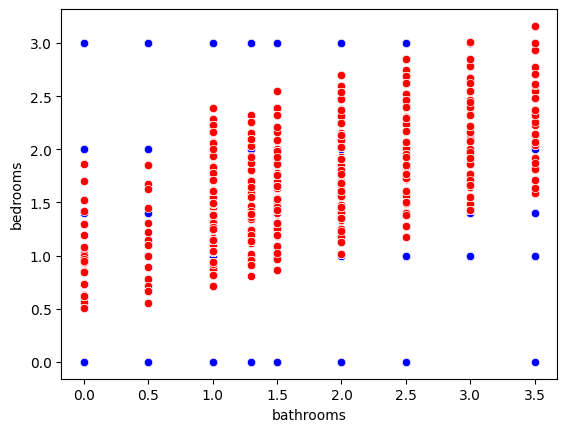

In [356]:
sns.scatterplot(x='bathrooms', y='bedrooms', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred7, color="red", data=df1)

In [357]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.5377607006042244

In [358]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.7333216897134739)

In [359]:
df1['bathrooms'] = df1['bathrooms'].round().astype(int)

C:\Users\lapep\AppData\Local\Temp\ipykernel_21844\2226389577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bathrooms'] = df1['bathrooms'].round().astype(int)


In [360]:
df1 = df1[df1['price'] < 40000]

In [361]:
Y8= df1['price']
X8= df1[['accommodates','bedrooms','bathrooms']]

In [362]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)
model8.fit(X=X8, y=Y8)

LinearRegression()

In [363]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'bathrooms'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([138.07931009, 189.32796695, 519.04371238]),
 'rank_': 3,
 'singular_': array([249.25379021,  91.12705284,  65.91259138]),
 'intercept_': np.float64(-77.86841465842917)}

In [364]:
#Predicciones
y_pred8= model8.predict(X=X8)
y_pred8

array([ 906.66188485, 1106.66445071, 1372.14847198, ...,  906.66188485,
        906.66188485,  906.66188485], shape=(26567,))

In [365]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones8', y_pred8)
df1

,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,host_id,host_acceptance_rate,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
0,906.661885,1.044733,2.121179,1.555729,1.992244,-0.012670,59.601768,2.620811e+08,153786,0.9,...,4.90,4.90,4.90,1.70,1,0,1,1.0,19.383820,-99.200000
1,1106.664451,1.248919,2.560187,1.403929,13.035024,0.496455,108.154664,2.158822e+08,196253,93.0,...,4.70,4.78,4.98,0.41,2,1,1,12.0,19.411620,-99.177940
2,1372.148472,1.604934,3.936823,1.156088,4.124222,0.296166,94.985870,1.811215e+08,334451,57.0,...,4.75,4.92,4.98,0.31,2,1,1,3.0,19.411520,-99.168570
3,906.661885,1.044733,2.121179,1.555729,4.390091,0.710675,109.880142,1.430520e+08,212109,100.0,...,4.96,4.98,4.96,0.83,3,1,1,3.0,19.356140,-99.163080
4,1425.705597,1.198459,2.153515,1.555729,6.360239,0.374705,90.019577,2.541407e+08,540705,100.0,...,5.00,4.73,4.91,0.11,2,1,1,5.0,19.432110,-99.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1372.148472,1.604934,3.936823,1.156088,7.510934,0.418224,89.293037,2.620811e+08,67472234,100.0,...,4.90,4.90,4.90,1.70,2,1,2,6.2,19.387329,-99.200000
26578,906.661885,1.044733,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26579,906.661885,1.044733,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26580,906.661885,1.044733,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,100.0,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736


<Axes: xlabel='bathrooms', ylabel='price'>

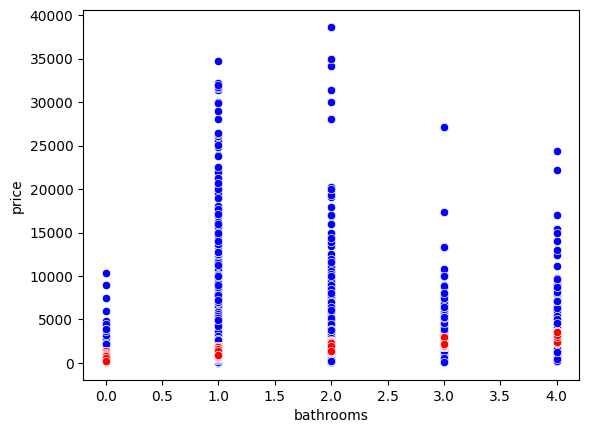

In [366]:
sns.scatterplot(x='bathrooms', y='price', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred8, color="red", data=df1)

In [367]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.07520090915954714

In [368]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.27422784169290165)

In [369]:
Y9= df1['reviews_per_month']
X9= df1[['number_of_reviews','host_is_superhost','host_acceptance_rate']]

In [370]:
from sklearn.linear_model import LinearRegression
model9= LinearRegression()
type(model9)
model9.fit(X=X9, y=Y9)

LinearRegression()

In [371]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'host_is_superhost', 'host_acceptance_rate'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.01072129, 0.23182109, 0.00254679]),
 'rank_': 3,
 'singular_': array([6200.41088518, 4568.44108077,   71.82914882]),
 'intercept_': np.float64(0.8534361761550631)}

In [372]:
#Predicciones
y_pred9= model9.predict(X=X9)
y_pred9

array([0.85572829, 2.00827141, 1.75576758, ..., 1.10811526, 1.10811526,
       1.33993635], shape=(26567,))

In [374]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones9', y_pred9)
df1

,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,host_id,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
0,0.855728,906.661885,1.044733,2.121179,1.555729,1.992244,-0.012670,59.601768,2.620811e+08,153786,...,4.90,4.90,4.90,1.70,1,0,1,1.0,19.383820,-99.200000
1,2.008271,1106.664451,1.248919,2.560187,1.403929,13.035024,0.496455,108.154664,2.158822e+08,196253,...,4.70,4.78,4.98,0.41,2,1,1,12.0,19.411620,-99.177940
2,1.755768,1372.148472,1.604934,3.936823,1.156088,4.124222,0.296166,94.985870,1.811215e+08,334451,...,4.75,4.92,4.98,0.31,2,1,1,3.0,19.411520,-99.168570
3,2.701540,906.661885,1.044733,2.121179,1.555729,4.390091,0.710675,109.880142,1.430520e+08,212109,...,4.96,4.98,4.96,0.83,3,1,1,3.0,19.356140,-99.163080
4,1.457871,1425.705597,1.198459,2.153515,1.555729,6.360239,0.374705,90.019577,2.541407e+08,540705,...,5.00,4.73,4.91,0.11,2,1,1,5.0,19.432110,-99.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.339936,1372.148472,1.604934,3.936823,1.156088,7.510934,0.418224,89.293037,2.620811e+08,67472234,...,4.90,4.90,4.90,1.70,2,1,2,6.2,19.387329,-99.200000
26578,1.108115,906.661885,1.044733,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26579,1.108115,906.661885,1.044733,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736
26580,1.108115,906.661885,1.044733,2.121179,1.555729,16.908277,0.418224,76.775953,2.620811e+08,596009321,...,4.90,4.90,4.90,1.70,2,0,2,16.0,19.432687,-99.197736


<Axes: xlabel='host_is_superhost', ylabel='reviews_per_month'>

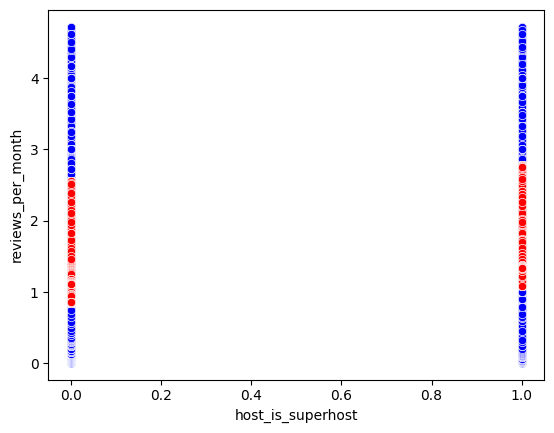

In [375]:
sns.scatterplot(x='host_is_superhost', y='reviews_per_month', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred9, color="red", data=df1)

In [376]:
coef_Deter9= model9.score(X=X9, y=Y9)
coef_Deter9

0.15548327718905364

In [377]:
coef_Correl9= np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.39431367867353223)

In [381]:
Corr_Factors10= df1.corr()
Corr_Factors10

,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,host_id,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
Predicciones9,1.000000,0.127151,0.163871,0.122185,-0.162146,0.103175,0.826936,0.775084,-0.582575,-0.116743,...,-0.155105,-0.097471,-0.117751,0.394314,-0.071459,0.577434,-0.227006,0.088897,0.077613,0.021624
Predicciones8,0.127151,1.000000,0.927460,0.804467,-0.810607,-0.013471,0.136889,0.099541,-0.124413,-0.026884,...,-0.014602,0.007606,0.017225,0.108408,-0.020666,0.103096,-0.361597,-0.015875,0.051261,-0.056902
Predicciones7,0.163871,0.927460,1.000000,0.832692,-0.949986,0.003361,0.185654,0.127856,-0.131440,-0.009802,...,-0.026448,-0.003494,-0.008456,0.139471,-0.032413,0.117825,-0.439110,-0.000248,0.075542,-0.048092
Predicciones6,0.122185,0.804467,0.832692,1.000000,-0.842211,-0.048265,0.121496,0.080576,-0.139321,-0.018285,...,-0.015110,0.010602,-0.010947,0.098649,-0.013571,0.098594,-0.402339,-0.050264,0.046730,-0.041778
Predicciones5,-0.162146,-0.810607,-0.949986,-0.842211,1.000000,0.007786,-0.179757,-0.119365,0.130886,0.001526,...,0.030646,0.006887,0.024928,-0.139096,0.029250,-0.111675,0.479530,0.011240,-0.078130,0.037685
Predicciones4,0.103175,-0.013471,0.003361,-0.048265,0.007786,1.000000,0.220037,0.504397,0.105138,0.044172,...,-0.084872,-0.115353,-0.014874,0.062186,-0.096472,0.035785,-0.002546,0.999561,0.112646,0.014707
Predicciones3,0.826936,0.136889,0.185654,0.121496,-0.179757,0.220037,1.000000,0.633539,-0.371084,-0.005306,...,-0.165858,-0.127078,-0.111279,0.519536,-0.078560,0.438361,-0.245818,0.196105,0.122883,0.023159
Predicciones2,0.775084,0.099541,0.127856,0.080576,-0.119365,0.504397,0.633539,1.000000,-0.325718,-0.083986,...,-0.056361,-0.026782,-0.054646,0.315222,-0.118799,0.810536,-0.179962,0.494760,0.093250,0.018865
Predicciones,-0.582575,-0.124413,-0.131440,-0.139321,0.130886,0.105138,-0.371084,-0.325718,1.000000,0.209097,...,0.079999,0.003270,0.048010,-0.147676,-0.017357,-0.212295,0.231222,0.102833,0.010987,-0.027550
host_id,-0.116743,-0.026884,-0.009802,-0.018285,0.001526,0.044172,-0.005306,-0.083986,0.209097,1.000000,...,0.015909,-0.034423,-0.040412,0.066527,-0.047820,-0.080835,0.038350,0.041840,0.081761,-0.005449


In [382]:
Corr_Factors11= abs(Corr_Factors10)
Corr_Factors11

,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,host_id,...,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_response_time,host_is_superhost,room_type,host_listings_count,latitude,longitude
Predicciones9,1.000000,0.127151,0.163871,0.122185,0.162146,0.103175,0.826936,0.775084,0.582575,0.116743,...,0.155105,0.097471,0.117751,0.394314,0.071459,0.577434,0.227006,0.088897,0.077613,0.021624
Predicciones8,0.127151,1.000000,0.927460,0.804467,0.810607,0.013471,0.136889,0.099541,0.124413,0.026884,...,0.014602,0.007606,0.017225,0.108408,0.020666,0.103096,0.361597,0.015875,0.051261,0.056902
Predicciones7,0.163871,0.927460,1.000000,0.832692,0.949986,0.003361,0.185654,0.127856,0.131440,0.009802,...,0.026448,0.003494,0.008456,0.139471,0.032413,0.117825,0.439110,0.000248,0.075542,0.048092
Predicciones6,0.122185,0.804467,0.832692,1.000000,0.842211,0.048265,0.121496,0.080576,0.139321,0.018285,...,0.015110,0.010602,0.010947,0.098649,0.013571,0.098594,0.402339,0.050264,0.046730,0.041778
Predicciones5,0.162146,0.810607,0.949986,0.842211,1.000000,0.007786,0.179757,0.119365,0.130886,0.001526,...,0.030646,0.006887,0.024928,0.139096,0.029250,0.111675,0.479530,0.011240,0.078130,0.037685
Predicciones4,0.103175,0.013471,0.003361,0.048265,0.007786,1.000000,0.220037,0.504397,0.105138,0.044172,...,0.084872,0.115353,0.014874,0.062186,0.096472,0.035785,0.002546,0.999561,0.112646,0.014707
Predicciones3,0.826936,0.136889,0.185654,0.121496,0.179757,0.220037,1.000000,0.633539,0.371084,0.005306,...,0.165858,0.127078,0.111279,0.519536,0.078560,0.438361,0.245818,0.196105,0.122883,0.023159
Predicciones2,0.775084,0.099541,0.127856,0.080576,0.119365,0.504397,0.633539,1.000000,0.325718,0.083986,...,0.056361,0.026782,0.054646,0.315222,0.118799,0.810536,0.179962,0.494760,0.093250,0.018865
Predicciones,0.582575,0.124413,0.131440,0.139321,0.130886,0.105138,0.371084,0.325718,1.000000,0.209097,...,0.079999,0.003270,0.048010,0.147676,0.017357,0.212295,0.231222,0.102833,0.010987,0.027550
host_id,0.116743,0.026884,0.009802,0.018285,0.001526,0.044172,0.005306,0.083986,0.209097,1.000000,...,0.015909,0.034423,0.040412,0.066527,0.047820,0.080835,0.038350,0.041840,0.081761,0.005449


<Axes: >

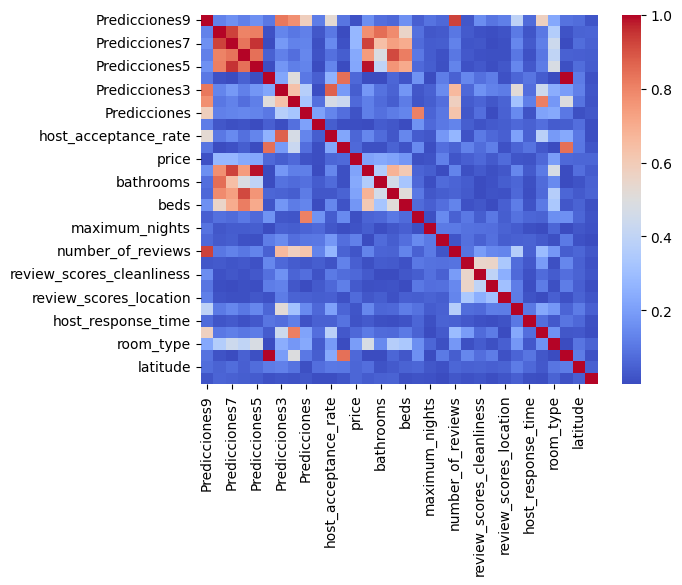

In [383]:
Heart_Nap = sns.heatmap(Corr_Factors11, cmap= 'coolwarm')
Heart_Nap

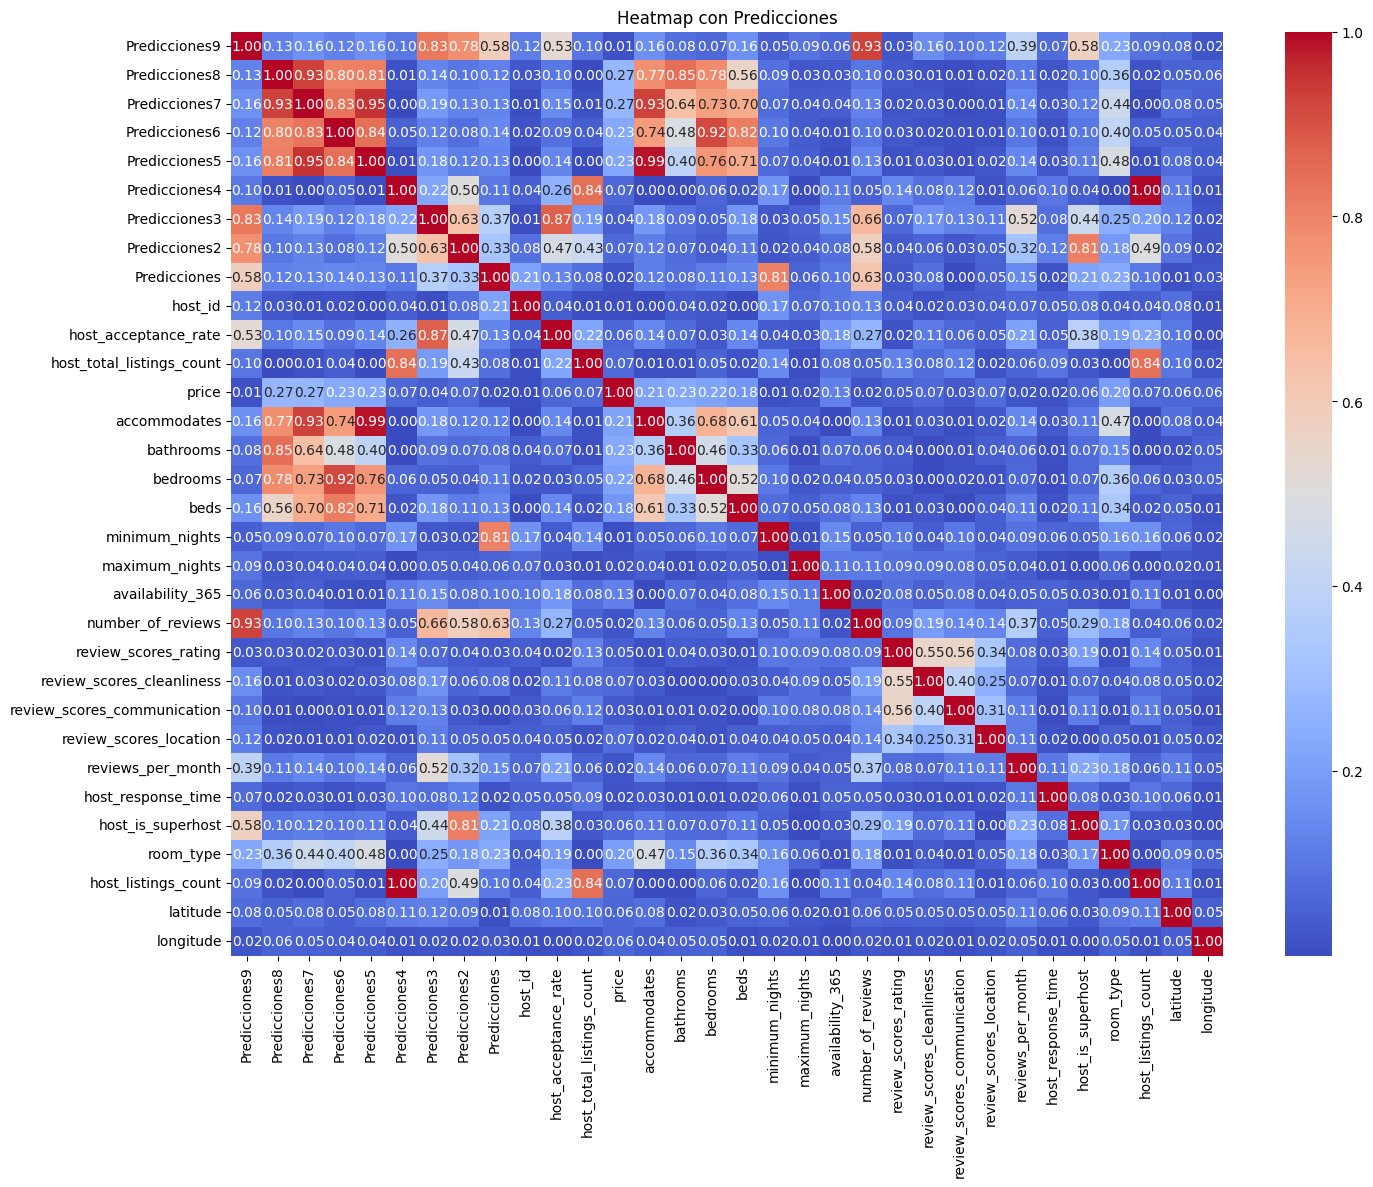

In [386]:
plt.figure(figsize=(16,12))
sns.heatmap(Corr_Factors11, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()